0.8초 이상 진행될 경우 값 저장

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Liftoff_result/Level1.csv')
df = df.loc[:, ['time', 'value']]
arr = df.values.tolist()

temp = 0
extreme_value = []

ext_time = []
ext_cord = []

def point_extreme(arr, i, temp):
    for j in range(temp, i):
        ext_time.append(arr[j][0])
        ext_cord.append(arr[j][1])    

#극값 찾기
for i in range(1, len(arr)):
    if arr[i][1] != arr[temp][1]:
        #If sum of time over 0.8s, save the value
        if(arr[i-1][0] - arr[temp][0] > 0.8):
            extreme_value.append(arr[temp][1])
            point_extreme(arr, i, temp)
        temp = i

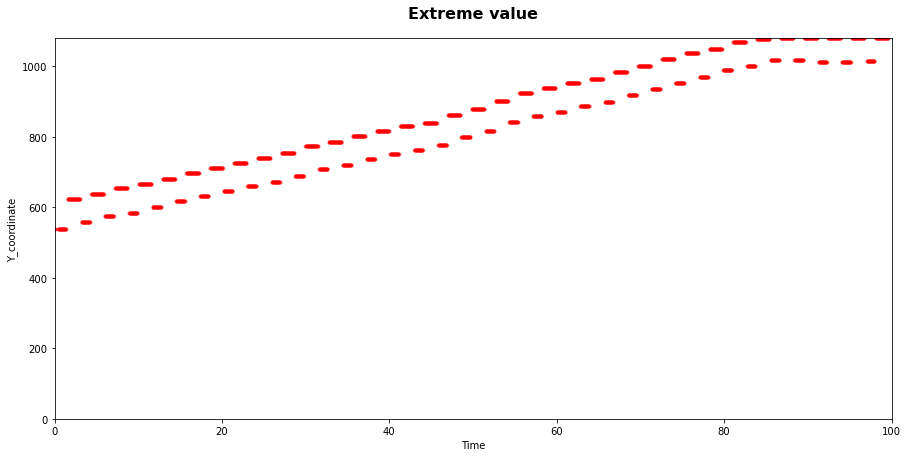

In [39]:
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
fig, ax = plt.subplots(figsize = (15,7))
plt.title('Extreme value', fontdict=title_font, pad = 20)
plt.xlabel('Time')
plt.ylabel('Y_coordinate')
plt.xlim([0, 100])
plt.ylim([0, 1080])
plt.scatter(ext_time, ext_cord, alpha = 0.3, s = 3**2, c = 'red')